### <center>Dara Finas Elen</center>
#### <center>F1D022038</center>

# Here you can put your extraordinary code

In [368]:
## import foo as 
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
## ...

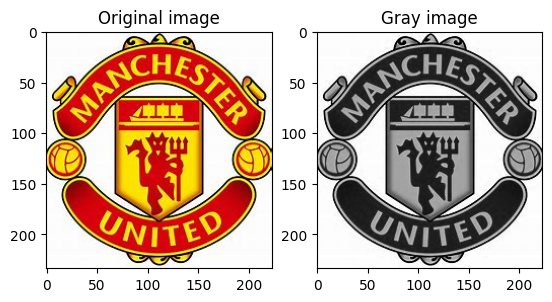

In [369]:
img = plt.imread('../assets/manchester_united.jpeg')
# plt.imshow(img, cmap='gray')

plt.subplot(121)
plt.title("Original image")
plt.imshow(img)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY) 
plt.subplot(122)
plt.title("Gray image")
plt.imshow(gray, cmap="gray") 

Text(0.5, 1.0, 'Gray Image')

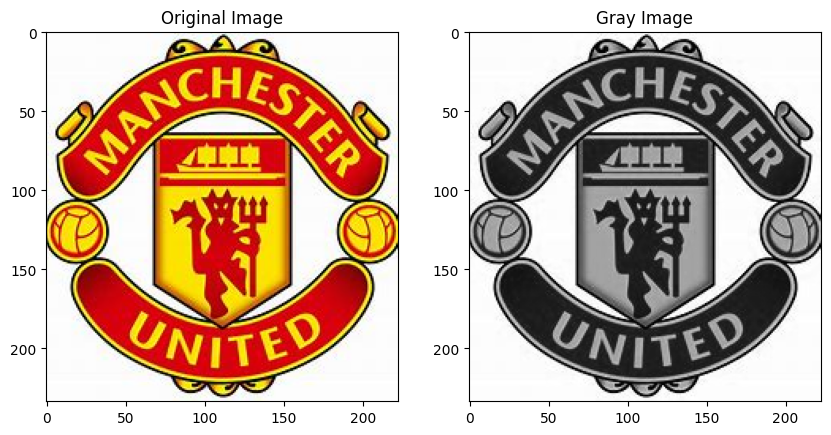

In [370]:
img = plt.imread('../assets/manchester_united.jpeg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax[0].imshow(img)
ax[0].set_title('Original Image')
ax[1].imshow(gray, cmap='gray')
ax[1].set_title('Gray Image')


In [371]:
print(img)

[[[253 253 253]
  [253 253 253]
  [253 253 253]
  ...
  [253 253 253]
  [253 253 253]
  [253 253 253]]

 [[253 253 253]
  [253 253 253]
  [253 253 253]
  ...
  [253 253 253]
  [253 253 253]
  [253 253 253]]

 [[253 253 253]
  [253 253 253]
  [253 253 253]
  ...
  [253 253 253]
  [253 253 253]
  [253 253 253]]

 ...

 [[253 253 253]
  [253 253 253]
  [253 253 253]
  ...
  [253 253 253]
  [253 253 253]
  [253 253 253]]

 [[253 253 253]
  [253 253 253]
  [253 253 253]
  ...
  [253 253 253]
  [253 253 253]
  [253 253 253]]

 [[253 253 253]
  [253 253 253]
  [253 253 253]
  ...
  [253 253 253]
  [253 253 253]
  [253 253 253]]]


In [372]:
print(gray)

[[253 253 253 ... 253 253 253]
 [253 253 253 ... 253 253 253]
 [253 253 253 ... 253 253 253]
 ...
 [253 253 253 ... 253 253 253]
 [253 253 253 ... 253 253 253]
 [253 253 253 ... 253 253 253]]


## 1. Perbaiki Kualitas Citra Gambar ##


In [373]:
kernelm_3 = np.full((3,3), 1/9)
kernelm_9 = np.full((9,9), 1/81)

In [374]:
def filter(gambar, kernel):
    tinggiGambar, lebarGambar = gambar.shape
    tinggiKernel, lebarKernel = kernel.shape

    tinggiCenter = int((tinggiKernel-1)/2)
    lebarCenter = int ((lebarKernel-1)/2)

    paddingKiri = lebarCenter
    paddingKanan = lebarKernel - lebarCenter
    paddingAtas = tinggiCenter
    paddingBawah = tinggiKernel - tinggiCenter
    gambar = np.pad(gambar, ((paddingKiri, paddingKanan), (paddingAtas, paddingBawah)), mode='edge')

    hasil = np.zeros([tinggiGambar, lebarGambar])
    for i in range(tinggiGambar):
        for j in range(lebarGambar):
            helper = 0
            for k in range(tinggiKernel):
                for l in range(lebarKernel):
                    helper += gambar[i+k, j+1]*kernel[k,1]
            hasil[i,j] = helper
    return hasil

In [375]:
def median(arr):
    n = len(arr)
    sorted_arr = sorted(arr)
    if n % 2 == 0:
        median1 = sorted_arr[n//2]
        median2 = sorted_arr[n//2-1]
        median = (median1 + median2)/2
    else:
        median = sorted_arr[n//2]
    
    return median

In [376]:
def filterMedian(gambar, kernel):
    tinggiGambar, lebarGambar = gambar.shape
    tinggiKernel, lebarKernel = kernel.shape

    tinggiCenter = int((tinggiKernel - 1)/2)
    lebarCenter = int((lebarKernel - 1)/2)

    paddingKiri = lebarCenter
    paddingKanan = lebarKernel - lebarCenter
    paddingAtas = tinggiCenter
    paddingBawah = tinggiKernel - tinggiCenter
    gambar = np.pad(gambar, ((paddingKiri, paddingKanan), (paddingAtas, paddingBawah)), mode='edge')

    hasil = np.zeros([tinggiGambar, lebarGambar])
    for i in range(tinggiGambar):
        for j in range(lebarGambar):
            temp = np.zeros(len(kernel)*len(kernel))
            indeks = 0
            for k in range(tinggiKernel):
                for l in range(lebarKernel):
                    temp[indeks] += gambar[i+k, j+l]
                    indeks +=1
                    hasil[i,j] = median(temp)
    return hasil

In [377]:
def modus(arr):
    count = {}
    for num in arr:
        if num in count:
            count[num] += 1
        else:
            count[num] = 1
    
    max_count = 0
    modus = None
    for num in count:
        if count[num] > max_count:
            max_count = count[num]
            modus = num
    return modus

In [378]:
def filterModus(gambar, kernel):
    tinggiGambar, lebarGambar = gambar.shape
    tinggiKernel, lebarKernel = kernel.shape

    tinggiCenter = int((tinggiKernel - 1)/2)
    lebarCenter = int((lebarKernel - 1)/2)

    paddingKiri = lebarCenter
    paddingKanan = lebarKernel - lebarCenter
    paddingAtas = tinggiCenter
    paddingBawah = tinggiKernel - tinggiCenter
    gambar = np.pad(gambar, ((paddingKiri, paddingKanan), (paddingAtas, paddingBawah)), mode='edge')

    hasil = np.zeros([tinggiGambar, lebarGambar])
    for i in range(tinggiGambar):
        for j in range(lebarGambar):
            temp = np.zeros(len(kernel)*len(kernel))
            indeks = 0
            for k in range(tinggiKernel):
                for l in range(lebarKernel):
                    temp[indeks] += gambar[i+k, j+l]
                    indeks +=1
                    hasil[i,j] = modus(temp)
    return hasil

In [379]:
kernel1 = np.array([[1/10, 1/10, 1/10],
                    [1/10, 1/5, 1/10],
                    [1/10, 1/10, 1/10]])

kernel2 = np.array([[1/9, 1/9, 1/9],
                    [1/9, 8/9, 1/9],
                    [1/9, 1/9, 1/9]])

In [380]:
def smoothing(gambar, kernel):
    tinggiGambar, lebarGambar = gambar.shape
    tinggiKernel, lebarKernel = kernel.shape

    tinggiCenter = int((tinggiKernel-1)/2)
    lebarCenter = int ((lebarKernel-1)/2)

    paddingKiri = lebarCenter
    paddingKanan = lebarKernel - lebarCenter
    paddingAtas = tinggiCenter
    paddingBawah = tinggiKernel - tinggiCenter
    gambar = np.pad(gambar, ((paddingKiri, paddingKanan), (paddingAtas, paddingBawah)), mode='edge')

    hasil = np.zeros([tinggiGambar, lebarGambar])
    for i in range(tinggiGambar):
        for j in range(lebarGambar):
            helper = 0
            for k in range(tinggiKernel):
                for l in range(lebarKernel):
                    helper += gambar[i+k, j+1]
            hasil[i,j] = helper/(tinggiKernel*lebarKernel)
    return hasil

In [381]:
def sharpening(gambar, kernel):
    tinggiGambar, lebarGambar = gambar.shape
    tinggiKernel, lebarKernel = kernel.shape

    tinggiCenter = int((tinggiKernel-1)/2)
    lebarCenter = int ((lebarKernel-1)/2)

    paddingKiri = lebarCenter
    paddingKanan = lebarKernel - lebarCenter
    paddingAtas = tinggiCenter
    paddingBawah = tinggiKernel - tinggiCenter
    gambar = np.pad(gambar, ((paddingKiri, paddingKanan), (paddingAtas, paddingBawah)), mode='edge')

    hasil = np.zeros([tinggiGambar, lebarGambar])
    for i in range(tinggiGambar):
        for j in range(lebarGambar):
            helper = 0
            for k in range(tinggiKernel):
                for l in range(lebarKernel):
                    helper += (gambar[i+k, j+1]*kernel[k,l])
            hasil[i,j] = helper
    return hasil

In [382]:
mean_3 = filter(gray, kernelm_3)
mean_9 = filter(gray, kernelm_9)

In [383]:
median_3 = filterMedian(gray, kernelm_3)
median_9 = filterMedian(gray, kernelm_9)

In [384]:
modus_3 = filterModus(gray, kernelm_3)
modus_9  = filterModus(gray, kernelm_9)

Text(0.5, 1.0, 'smoothing pake kernel2')

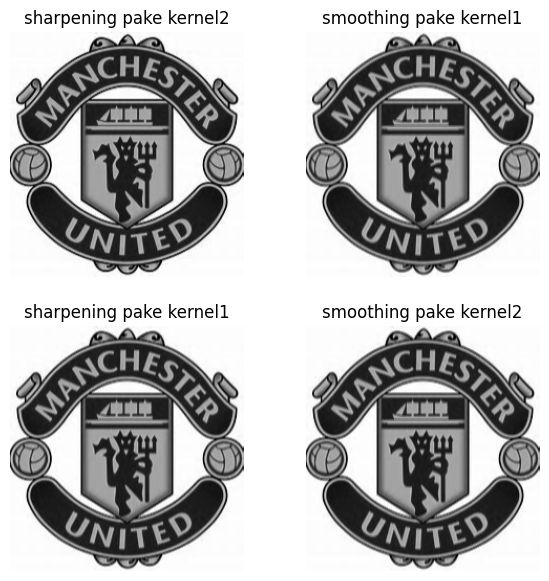

In [385]:
sharpeningVar = sharpening(gray, kernel2)
smoothingVar = smoothing(gray, kernel1)
shar = sharpening(gray, kernel1)
smoo = smoothing(gray, kernel2)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(7, 7))
for row in ax:
    for col in row:
        col.axis('off')
        col.grid(False)

ax[0][0].imshow(sharpeningVar, cmap='gray')
ax[0][0].set_title('sharpening pake kernel2')
ax[0][1].imshow(smoothingVar, cmap='gray')
ax[0][1].set_title('smoothing pake kernel1')
ax[1][0].imshow(shar, cmap='gray')
ax[1][0].set_title('sharpening pake kernel1')
ax[1][1].imshow(smoo, cmap='gray')
ax[1][1].set_title('smoothing pake kernel2')

Text(0.5, 1.0, 'Median 9x9')

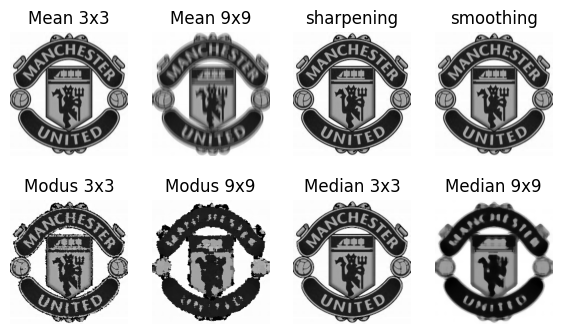

In [386]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(7, 4))
for row in ax:
    for col in row:
        col.axis('off')
        col.grid(False)

ax[0][0].imshow(mean_3, cmap='gray')
ax[0][0].set_title('Mean 3x3')
ax[0][1].imshow(mean_9, cmap='gray')
ax[0][1].set_title('Mean 9x9')
ax[0][2].imshow(sharpeningVar, cmap='gray')
ax[0][2].set_title('sharpening')
ax[0][3].imshow(smoothingVar, cmap='gray')
ax[0][3].set_title('smoothing')
ax[1][0].imshow(modus_3, cmap='gray')
ax[1][0].set_title('Modus 3x3')
ax[1][1].imshow(modus_9, cmap='gray')
ax[1][1].set_title('Modus 9x9')
ax[1][2].imshow(median_3, cmap='gray')
ax[1][2].set_title('Median 3x3')
ax[1][3].imshow(median_9, cmap='gray')
ax[1][3].set_title('Median 9x9')



## 2. Deteksi Tepi ##

In [396]:
def padding(gambar, kernel):
    if len(kernel)%2 == 0:
        n = int(len(kernel)/2)
        hasil = np.pad(gambar, ([0,n], [0,n]))
    else:
        n = int((len(kernel)-1)/2)
        hasil = np.pad(gambar, ([n,n], [n,n]))
    return hasil

In [397]:
def konvolusi(pad, gambar, kernel):
    hasil = np.zeros(gambar.shape).astype(int)
    for i in range(gambar.shape[0]):
        for j in range(gambar.shape[1]):

            for k in range(len(kernel)):
                for l in range(len(kernel)):
                    hasil[i,j] += pad[i+k, j+l] * kernel[k][l]
    return hasil

In [398]:
def deteksi_tepi(gambar, kernel1, kernel2):
    paddingGambar = padding(gambar, kernel1)

    konv1 = konvolusi(paddingGambar, gambar, kernel1)
    konv2 = konvolusi(paddingGambar, gambar, kernel2)

    square1 = konv1 * konv1
    square2 = konv2 * konv2

    Gradient_Y = np.zeros(square1.shape).astype(int)
    Gradient_Y = np.sqrt(square1)
    
    Gradient_X = np.zeros(square2.shape).astype(int)
    Gradient_X = np.sqrt(square2)

    jumlah = square1 + square2
    hasil = np.sqrt(jumlah)


    return hasil, Gradient_X, Gradient_Y



# Metode Sobel

In [413]:
# kernel sobel
Sx = [[-1, 0, 1],
      [-2, 0, 2],
      [-1, 0, 1]]
Sy = [[ 1, 2, 1],
      [ 0, 0, 0],
      [-1,-2,-1]]

Text(0.5, 1.0, 'Hasil Sobel')

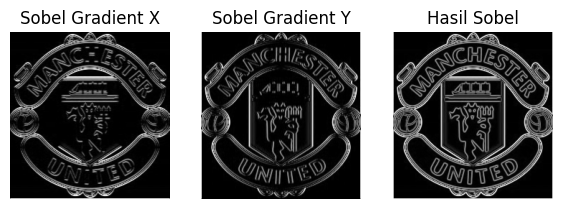

In [415]:
sobel_img, sobel_imgX, sobel_imgY = deteksi_tepi(gray, Sx, Sy)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(7, 4))
for a in ax:
    a.axis('off')

ax[0].imshow(sobel_imgX, cmap='gray')
ax[0].set_title('Sobel Gradient X')
ax[1].imshow(sobel_imgY, cmap='gray')
ax[1].set_title('Sobel Gradient Y')
ax[2].imshow(sobel_img, cmap='gray')
ax[2].set_title('Hasil Sobel')

# Prewitt

In [401]:
#Kernel Prewitt
Px = [[-1, 0, 1],
      [-1, 0, 1],
      [-1, 0, 1]]
Py = [[ 1, 1, 1],
      [ 0, 0, 0],
      [-1,-1,-1]]

Text(0.5, 1.0, 'Hasil Prewitt')

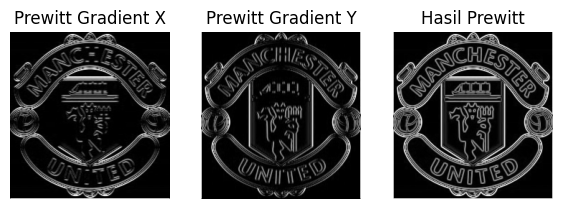

In [416]:
prewitt_img, prewitt_imgX, prewitt_imgY = deteksi_tepi(gray, Px, Py)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(7, 4))
for a in ax:
    a.axis('off')

ax[0].imshow(prewitt_imgX, cmap='gray')
ax[0].set_title('Prewitt Gradient X')
ax[1].imshow(prewitt_imgY, cmap='gray')
ax[1].set_title('Prewitt Gradient Y')
ax[2].imshow(prewitt_img, cmap='gray')
ax[2].set_title('Hasil Prewitt')

In [403]:
#Kernel Roberts
Rp = [[ 1, 0],
      [ 0,-1]]
Rm = [[ 0, 1],
      [-1, 0]]

Text(0.5, 1.0, 'Hasil Roberts')

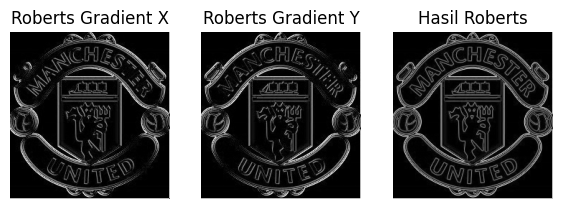

In [417]:
roberts_img, roberts_imgX, roberts_imgY = deteksi_tepi(gray, Rp, Rm)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(7, 4))
for a in ax:
    a.axis('off')

ax[0].imshow(roberts_imgX, cmap='gray')
ax[0].set_title('Roberts Gradient X')
ax[1].imshow(roberts_imgY, cmap='gray')
ax[1].set_title('Roberts Gradient Y')
ax[2].imshow(roberts_img, cmap='gray')
ax[2].set_title('Hasil Roberts')

Text(0.5, 1.0, 'Hasil Roberts')

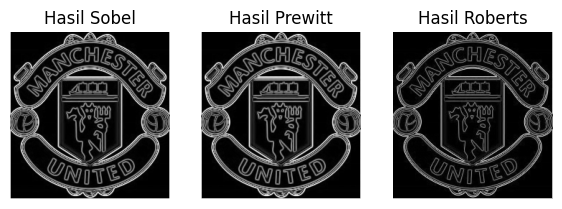

In [407]:
#Gabungan ketiganya
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(7, 4))
for a in ax:
    a.axis('off')

ax[0].imshow(sobel_img, cmap='gray')
ax[0].set_title('Hasil Sobel')
ax[1].imshow(prewitt_img, cmap='gray')
ax[1].set_title('Hasil Prewitt')
ax[2].imshow(roberts_img, cmap='gray')
ax[2].set_title('Hasil Roberts')

In [418]:
Sobelmean_3 = filter(sobel_img, kernelm_3)
Sobelmean_9 = filter(sobel_img, kernelm_9)

Sobelmedian_3 = filterMedian(sobel_img, kernelm_3)
Sobelmedian_9 = filterMedian(sobel_img, kernelm_9)

Sobelmodus_3 = filterModus(sobel_img, kernelm_3)
Sobelmodus_9  = filterModus(sobel_img, kernelm_9)

SobelsharpeningVar = sharpening(sobel_img, kernel2)
SobelsmoothingVar = smoothing(sobel_img, kernel1)

Text(0.5, 1.0, 'Sobel Median 9x9')

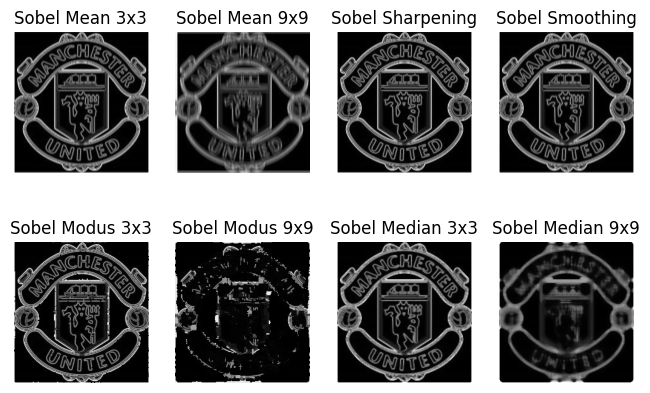

In [419]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(8, 5))
for row in ax:
    for col in row:
        col.axis('off')
        col.grid(False)

ax[0][0].imshow(Sobelmean_3, cmap='gray')
ax[0][0].set_title('Sobel Mean 3x3')
ax[0][1].imshow(Sobelmean_9, cmap='gray')
ax[0][1].set_title('Sobel Mean 9x9')
ax[0][2].imshow(SobelsharpeningVar, cmap='gray')
ax[0][2].set_title('Sobel Sharpening')
ax[0][3].imshow(SobelsmoothingVar, cmap='gray')
ax[0][3].set_title('Sobel Smoothing')
ax[1][0].imshow(Sobelmodus_3, cmap='gray')
ax[1][0].set_title('Sobel Modus 3x3')
ax[1][1].imshow(Sobelmodus_9, cmap='gray')
ax[1][1].set_title('Sobel Modus 9x9')
ax[1][2].imshow(Sobelmedian_3, cmap='gray')
ax[1][2].set_title('Sobel Median 3x3')
ax[1][3].imshow(Sobelmedian_9, cmap='gray')
ax[1][3].set_title('Sobel Median 9x9')

In [420]:
prewittmean_3 = filter(prewitt_img, kernelm_3)
prewittmean_9 = filter(prewitt_img, kernelm_9)

prewittmedian_3 = filterMedian(prewitt_img, kernelm_3)
prewittmedian_9 = filterMedian(prewitt_img, kernelm_9)

prewittmodus_3 = filterModus(prewitt_img, kernelm_3)
prewittmodus_9  = filterModus(prewitt_img, kernelm_9)

prewittsharpeningVar = sharpening(prewitt_img, kernel2)
prewittsmoothingVar = smoothing(prewitt_img, kernel1)

Text(0.5, 1.0, 'Prewitt Median 9x9')

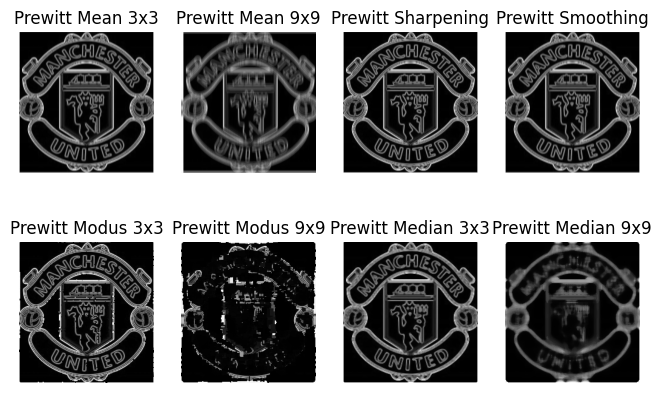

In [421]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(8, 5))
for row in ax:
    for col in row:
        col.axis('off')
        col.grid(False)

ax[0][0].imshow(prewittmean_3, cmap='gray')
ax[0][0].set_title('Prewitt Mean 3x3')
ax[0][1].imshow(prewittmean_9, cmap='gray')
ax[0][1].set_title('Prewitt Mean 9x9')
ax[0][2].imshow(prewittsharpeningVar, cmap='gray')
ax[0][2].set_title('Prewitt Sharpening')
ax[0][3].imshow(prewittsmoothingVar, cmap='gray')
ax[0][3].set_title('Prewitt Smoothing')
ax[1][0].imshow(prewittmodus_3, cmap='gray')
ax[1][0].set_title('Prewitt Modus 3x3')
ax[1][1].imshow(prewittmodus_9, cmap='gray')
ax[1][1].set_title('Prewitt Modus 9x9')
ax[1][2].imshow(prewittmedian_3, cmap='gray')
ax[1][2].set_title('Prewitt Median 3x3')
ax[1][3].imshow(prewittmedian_9, cmap='gray')
ax[1][3].set_title('Prewitt Median 9x9')

In [425]:
robertsmean_3 = filter(roberts_img, kernelm_3)
robertsmean_9 = filter(roberts_img, kernelm_9)

robertsmedian_3 = filterMedian(roberts_img, kernelm_3)
robertsmedian_9 = filterMedian(roberts_img, kernelm_9)

robertsmodus_3 = filterModus(roberts_img, kernelm_3)
robertsmodus_9  = filterModus(roberts_img, kernelm_9)

robertssharpeningVar = sharpening(roberts_img, kernel2)
robertssmoothingVar = smoothing(roberts_img, kernel1)

Text(0.5, 1.0, 'Roberts Median 9x9')

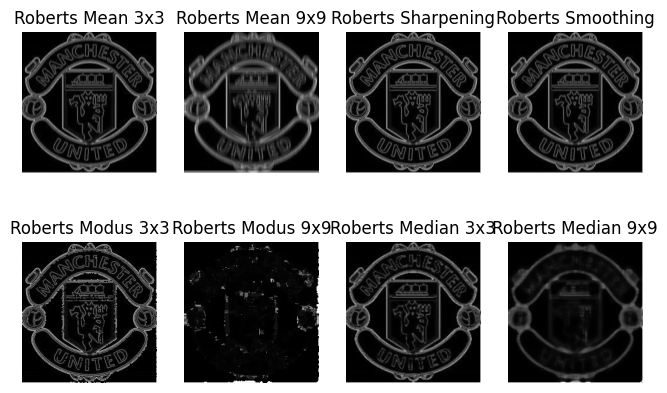

In [426]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(8, 5))
for row in ax:
    for col in row:
        col.axis('off')
        col.grid(False)

ax[0][0].imshow(robertsmean_3, cmap='gray')
ax[0][0].set_title('Roberts Mean 3x3')
ax[0][1].imshow(robertsmean_9, cmap='gray')
ax[0][1].set_title('Roberts Mean 9x9')
ax[0][2].imshow(robertssharpeningVar, cmap='gray')
ax[0][2].set_title('Roberts Sharpening')
ax[0][3].imshow(robertssmoothingVar, cmap='gray')
ax[0][3].set_title('Roberts Smoothing')
ax[1][0].imshow(robertsmodus_3, cmap='gray')
ax[1][0].set_title('Roberts Modus 3x3')
ax[1][1].imshow(robertsmodus_9, cmap='gray')
ax[1][1].set_title('Roberts Modus 9x9')
ax[1][2].imshow(robertsmedian_3, cmap='gray')
ax[1][2].set_title('Roberts Median 3x3')
ax[1][3].imshow(robertsmedian_9, cmap='gray')
ax[1][3].set_title('Roberts Median 9x9')